<a href="https://colab.research.google.com/github/WiIIiamTang/term_project_360-420-w2019-section2-Tang-Dinh/blob/master/UCI_wine_data_exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of *wine* dataset from UCI ML Repository
##  William Tang and Jason Dinh
### Adapted from Sameer Bhatnagar's "Exploratory Data Analysis of *Adult* dataset from UCI ML Repository" at https://colab.research.google.com/drive/19lbKm8hmouZ4ey9DcSe0GTXrOna-vyxy#scrollTo=_aGVPkIUqXmE

360-420 DW Winter 2019

Dawson College


# Import Packages

In [0]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt

# Set path to data and columns names

In [0]:
url_path='https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

names_list=[
    'TARGET',
 	'Alcohol',
 	'Malic acid',
  'Ash',
	'Alcalinity of ash',
 	'Magnesium',
	'Total phenols',
 	'Flavanoids',
 	'Nonflavanoid phenols',
 	'Proanthocyanins',
	'Color intensity',
 	'Hue',
 	'OD280/OD315 of diluted wines',
 	'Proline'
]



# Load the data from UCI Machine Learning Repository

In [0]:
f=requests.get(url_path)

df=pd.read_csv(url_path,
    names=names_list
)

# Inspect The first few columns

In [88]:
df.head(10)


,TARGET,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


# Distributions of *Continous* Variables

In [89]:
df.describe()

,TARGET,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [0]:
def boxplot_by_target_class(continuous_var):
  
  fig, ax = plt.subplots(figsize=(10,8))

  axes = df.boxplot(column=continuous_var, by='TARGET',ax=ax)

  return axes

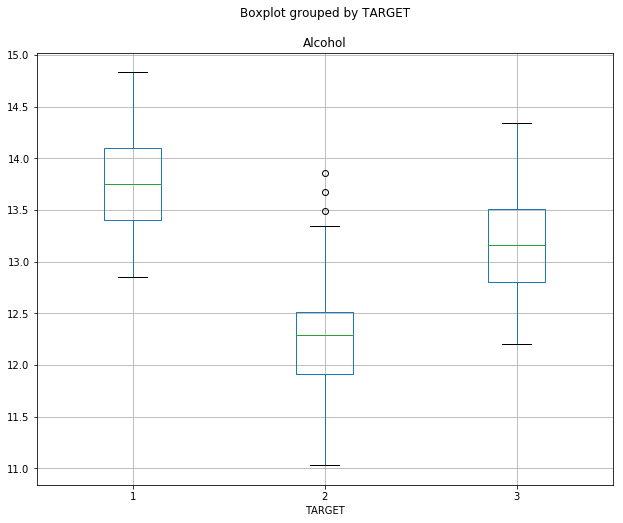

In [91]:
v=continuous_vars[0]
boxplot_by_target_class(v)

# Distributions of *Continous* Variables by Target Class

In [0]:
array = df.values
X = array[:, 1:]
Y = array[:, 0]

def make_plot(x, y, var1, var2):
  wine1 = x[y == 1]
  wine2 = x[y == 2]
  wine3 = x[y == 3]
  
  plt.scatter(wine1[:, var1], wine1[:, var2], label='wine1',color='g')
  plt.scatter(wine2[:, var1], wine2[:, var2], label='wine2',color='r')
  plt.legend()
  str1 = "Feature " + str(var1+1)
  str2 = "Feature " + str(var2+1)
  plt.xlabel(str1)
  plt.ylabel(str2)
  plt.show()

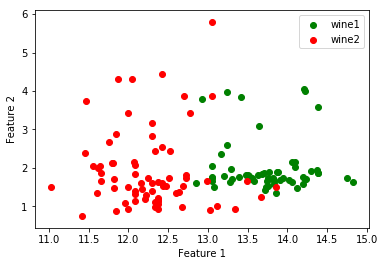

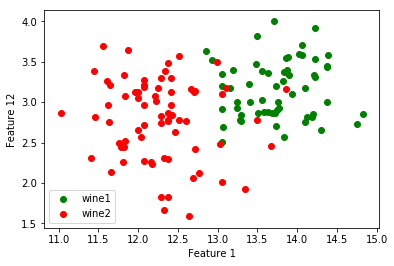

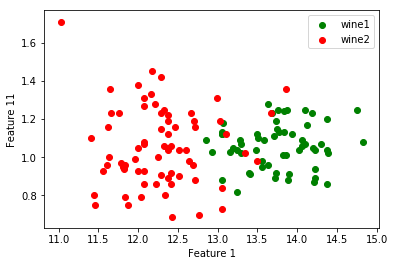

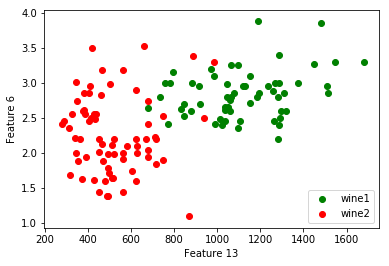

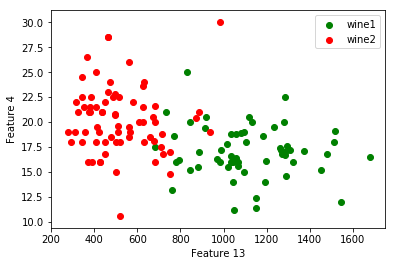

In [129]:
make_plot(X,Y, 0, 1)
make_plot(X,Y, 0, 11)
make_plot(X,Y, 0, 10)
make_plot(X,Y, 12, 5)
make_plot(X,Y, 12, 3)

The above plots show some good separation. Features 1 and 13 seem to good indicators of the difference between wine 1 and wine 2. Here's an example of a bad separation:

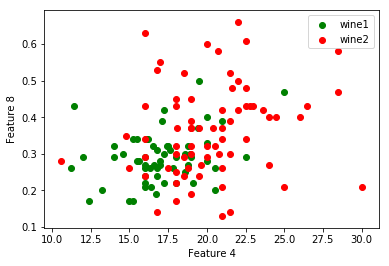

In [128]:
make_plot(X,Y, 3, 7)


In this case it is hard to come up with rules based on this plot.